## Exercise 1: a scatter plot

1. Download the file `halos.dat` from today's exercise page. This is a text file containing $x$, $y$, $z$ positions and masses for dark matter halos in a cosmological simulation. Positions are in Mpc and masses are in $M_{\odot}$.





In [1]:
#Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab15\halos.dat",comment='#', delim_whitespace=True, names=['x', 'y', 'z', 'mass'])


C:\Users\eklav\AppData\Local\Temp\ipykernel_25856\4055625638.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab15\halos.dat",comment='#', delim_whitespace=True, names=['x', 'y', 'z', 'mass'])


2. Create a scatter plot of the $(x,y)$ coordinates of the halos. Represent each halo by a circle whose size is proportional to the logarithm of the halo’s mass: size = $70[\log(M/M_{\odot}) - 11.4]$.



C:\Users\eklav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


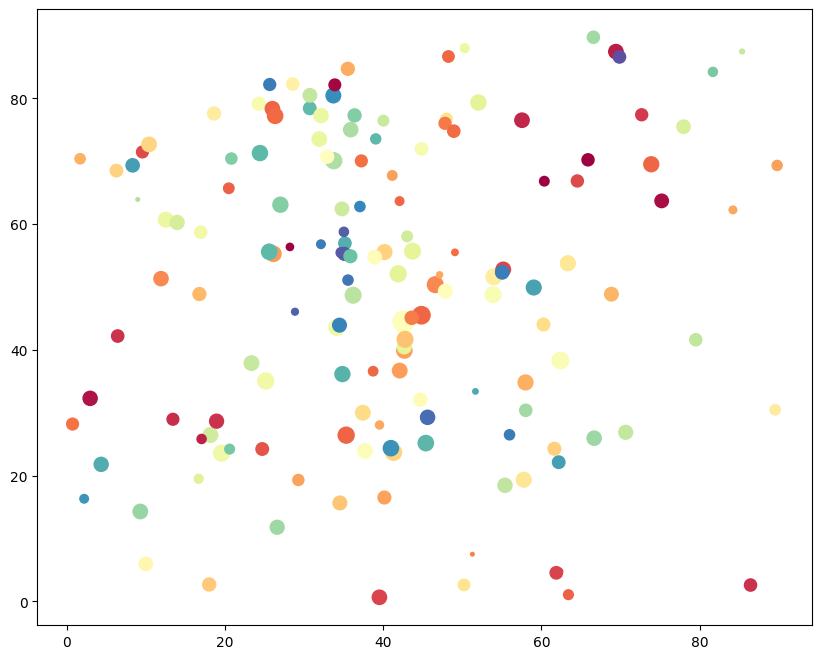

In [7]:
#Code Here
data['size'] = 70 * (np.log10(data['mass']) - 11.4)
plt.figure(figsize=(10, 8))
sc = plt.scatter(data['x'], data['y'], s=data['size'], c=data['z'], cmap='Spectral')

3. Using your favorite color map, make the color of each circle proportional to the $z$-coordinate of the corresponding halo. If you don’t like the default colors, you can change the color map using `plt.set_cmap('Spectral')`. See the gallery for examples.



4. Include an appropriate title and axis labels.

<function matplotlib.pyplot.show(close=None, block=None)>

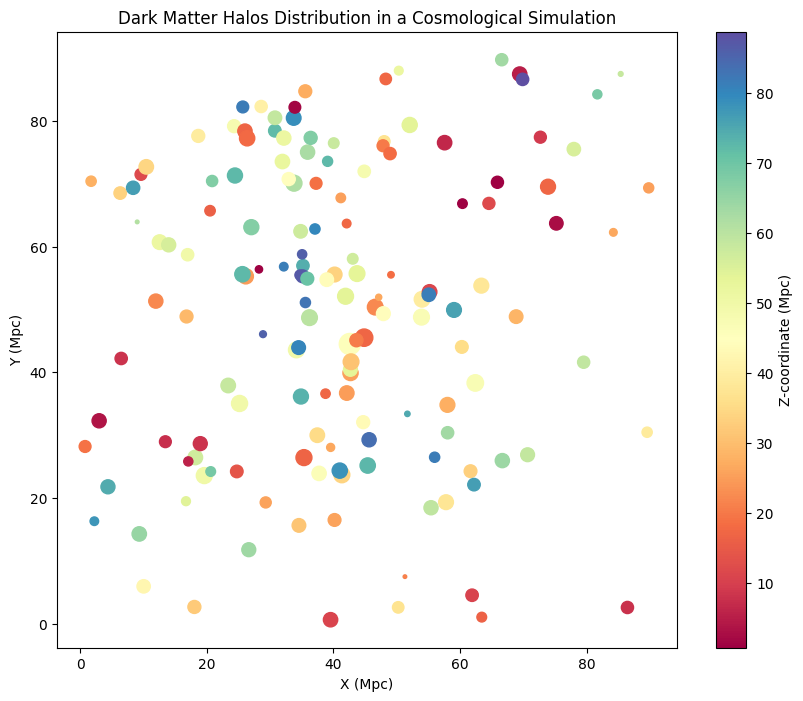

In [12]:
#Code Here
data['size'] = 70 * (np.log10(data['mass']) - 11.4)
plt.figure(figsize=(10, 8))
sc = plt.scatter(data['x'], data['y'], s=data['size'], c=data['z'], cmap='Spectral')
plt.colorbar(sc, label='Z-coordinate (Mpc)')
plt.set_cmap('Spectral')
plt.title('Dark Matter Halos Distribution in a Cosmological Simulation')
plt.xlabel('X (Mpc)')
plt.ylabel('Y (Mpc)')
plt.show

## Exercise 2: pulsars

Download the file "atnf_pulsars_20200112.dat" from the exercise page. This is a fixed-width ASCII table containing data from the Australia Telescope National Facility (ATNF) catalog of pulsars in our Galaxy known as of 1/12/20.

1. Use `astropy.io.ascii` to read the table. You might need to give the reader the hint that the format is 'fixed_width' and the header starts on line 2.




In [23]:
#Code Here
from astropy.io import ascii
pulsar_data  = ascii.read(r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab15\atnf_pulsars_20200112.dat",format = 'fixed_width', header_start = 2,delimiter = '|')
pulsar_data.columns


<TableColumns names=('name','ra','dec','period','period_error','period_dot','period_dot_error','dm','dm_error','flux_1400_mhz','flux_1400_mhz_error','spect_index','spect_index_error','a1','a1_error','eccentricity','eccentricity_error','min_mass','median_mass','companion_type','mass_ratio','mass_ratio_error','distance','pulsar_type','age','b_surf','transverse_velocity')>

2. Extract the pulsar periods $P$ (column `period`), rate of change of periods $\dot{P}$ (column `period_dot`), and companion types (column `companion_type`).



In [24]:
#Code Here
periods = pulsar_data['period']
period_dots = pulsar_data['period_dot']
companion_types = pulsar_data['companion_type']

3. The companion type will be masked out if the pulsar is an isolated pulsar, or else one of 'MS', 'NS', 'CO', 'He', or 'UL' depending on the type of binary companion. Make two boolean mask arrays to select the pulsars that are in binaries vs. not in binaries. *Hint*: use the `mask` attribute of the `companion_type` column object.



In [25]:
#Code Here
bin_mask = ~companion_types.mask  
iso_mask = companion_types.mask  

4. Make a log-log scatter plot of $\dot{P}$ vs. $P$. Make binary pulsars and isolated pulsars two separate colors, and produce an appropriate legend. Make appropriate axis labels ($P$ is in units of seconds, while $\dot{P}$ is dimensionless).



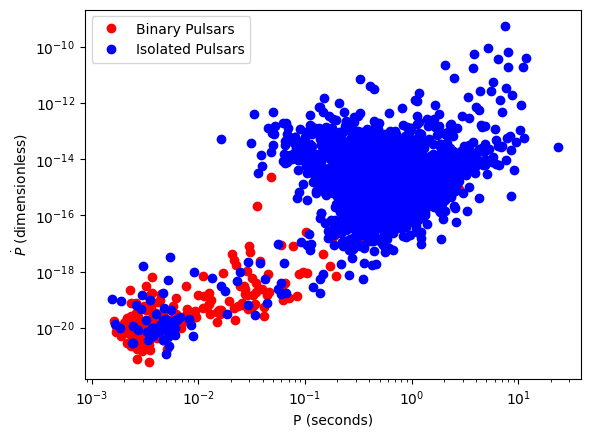

In [32]:
#Code Here
plt.loglog(periods[bin_mask], period_dots[bin_mask], 'ro', label='Binary Pulsars')
plt.loglog(periods[iso_mask], period_dots[iso_mask], 'bo', label='Isolated Pulsars')
plt.xlabel('P (seconds)')
plt.ylabel(r'$\dot{P}$ (dimensionless)') #latex from the question helper here
plt.legend()
plt.show()

5. Finally, overplot the "pulsar death line." This is (roughly) the function
   $$
   \dot{P}_{\text{death}} = 7.14 \times 10^{-18} \left( \frac{P}{\text{sec}} \right)^{3.2}
   $$
   and corresponds to the line beyond which pulsars stop producing pulses. You can draw a line by defining two points on the line and connecting them.

In [28]:
def death_line(value):
    return 7.14e-18 * value**3.2

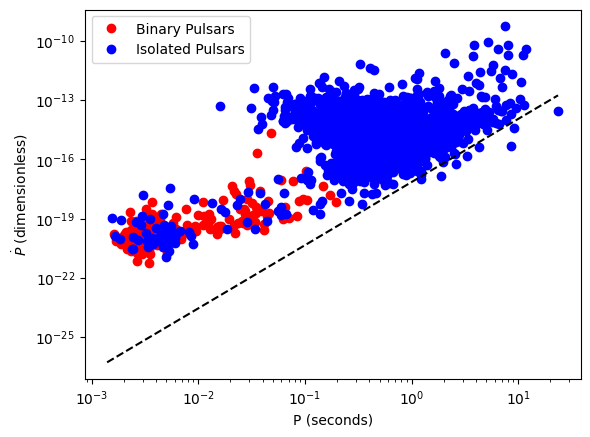

In [31]:
#Code Here
plt.loglog(periods[bin_mask], period_dots[bin_mask], 'ro', label='Binary Pulsars')
plt.loglog(periods[iso_mask], period_dots[iso_mask], 'bo', label='Isolated Pulsars')
plt.xlabel('P (seconds)')
plt.ylabel(r'$\dot{P}$ (dimensionless)')
plt.legend()
p_min, p_max = min(periods), max(periods)
plt.loglog([p_min, p_max], [death_line(p_min), death_line(p_max)], 'k--', label='Death Line')
plt.show()